<a href="https://colab.research.google.com/github/segzy01/Oluwasegun-Durowoju-Prework/blob/master/Signlanguage_to_english.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Apr 25 02:54:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    39W / 300W |  15544MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
import pathlib
from google.colab import files
files.upload()

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
! kaggle datasets download -d rahulmakwana/american-sign-language-recognition

 97% 46.0M/47.4M [00:02<00:00, 32.3MB/s]
100% 47.4M/47.4M [00:02<00:00, 22.6MB/s]


In [ ]:
from google.colab import drive
import zipfile
drive.mount('/content/drive')
zip_ref = zipfile.ZipFile('/content/american-sign-language-recognition.zip','r')
zip_ref.extractall('/tmp')
zip_ref.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten,Activation,add
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Input, SeparableConv2D, GlobalAveragePooling2D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from google.colab import drive
import zipfile
import os
import pathlib
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from keras import backend as K




train_data = ImageDataGenerator(rescale = 1./255,validation_split = 0.2)
dataset_train = train_data.flow_from_directory('/tmp/training_set',target_size =(64,64),
                                                              shuffle=True,batch_size=500,class_mode ='categorical', subset = 'training')

dataset_test = train_data.flow_from_directory('/tmp/training_set',target_size =(64,64),
                                                              shuffle=False,batch_size=500,class_mode ='categorical', subset = 'training')

test = train_data.flow_from_directory('/tmp/test_set',target_size =(64,64),
                                                              shuffle=False,batch_size=500,class_mode ='categorical', subset = 'validation')
class_names = list(dataset_train.class_indices.keys())
print(class_names)


Found 48298 images belonging to 40 classes.
Found 48298 images belonging to 40 classes.
Found 1600 images belonging to 40 classes.
['1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'best of luck', 'fuck you', 'i love you', 'space']


In [ ]:
for image_batch, labels_batch in dataset_train: # showing all batches
  print(image_batch.shape,'--->(# of batches, image_size, channel type "RGB=3")')
  print(labels_batch)
  break

(32, 224, 224, 3) --->(# of batches, image_size, channel type "RGB=3")
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
import numpy as np

for _ in range(10):
    plt.figure(figsize=(3, 3))
    img, label = dataset_train.next()
    plt.imshow(img[0])
    class_name = class_names[np.argmax(label[0])] # shows class
    plt.title(class_name[0:])
    plt.show()
print(img.shape)  #  (10, 200, 200, 3)
print(label[1])
print(dataset_train.class_indices)

In [ ]:
number_of_classes = 40
model = Sequential()
model.add(Conv2D(64, kernel_size = (5,5), input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))
model.summary()




Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 60, 60, 64)        4864      
                                                                 
 batch_normalization_16 (Bat  (None, 60, 60, 64)       256       
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 30, 30, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 32)       

In [ ]:
Epochs = 60
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

In [ ]:
history1 =model.fit(dataset_train, epochs = Epochs,  validation_data=test,   shuffle = 1)

Epoch 1/60
97/97 [==============================] - 20s 201ms/step - loss: 3.3512 - accuracy: 0.0780 - val_loss: 3.5189 - val_accuracy: 0.0737
Epoch 2/60
97/97 [==============================] - 19s 199ms/step - loss: 3.2500 - accuracy: 0.0909 - val_loss: 3.3689 - val_accuracy: 0.0825
Epoch 3/60
97/97 [==============================] - 19s 198ms/step - loss: 3.1524 - accuracy: 0.1023 - val_loss: 3.2081 - val_accuracy: 0.1175
Epoch 4/60
97/97 [==============================] - 19s 195ms/step - loss: 3.0575 - accuracy: 0.1189 - val_loss: 3.0740 - val_accuracy: 0.1338
Epoch 5/60
97/97 [==============================] - 19s 199ms/step - loss: 2.9699 - accuracy: 0.1325 - val_loss: 2.9673 - val_accuracy: 0.1513
Epoch 6/60
97/97 [==============================] - 19s 195ms/step - loss: 2.8802 - accuracy: 0.1655 - val_loss: 2.8723 - val_accuracy: 0.2438
Epoch 7/60
97/97 [==============================] - 19s 196ms/step - loss: 2.7957 - accuracy: 0.2090 - val_loss: 2.7871 - val_accuracy: 0.2619

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
dataset_train.reset()
test.reset()

predicted_scores1 = model.predict(dataset_test, verbose=1)
predicted_labels1 = predicted_scores1.argmax(axis=1)

train_labels1 = dataset_test.labels

print(train_labels1)
print(predicted_labels1)

acc_score1 = accuracy_score(train_labels1, predicted_labels1)
CFM1 = confusion_matrix(train_labels1, predicted_labels1)

print("\n", "Accuracy: " + str(format(acc_score1,'.3f')))
print("\n", "CFM: \n", confusion_matrix(train_labels1, predicted_labels1))
print("\n", "Classification report: \n", classification_report(train_labels1, predicted_labels1))

97/97 [==============================] - 19s 190ms/step
[ 0  0  0 ... 39 39 39]
[ 0  0  0 ... 39 39 39]

 Accuracy: 0.953

 CFM: 
 [[1120    0    0 ...    0    0    0]
 [   0 1212    0 ...    0    0    0]
 [   0    0 1120 ...    0    0    0]
 ...
 [   0    0    0 ... 1129    0    0]
 [   0    0    0 ...    0 1245    0]
 [   0    0    3 ...    3    0 1169]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1120
           1       0.98      1.00      0.99      1212
           2       1.00      1.00      1.00      1120
           3       0.99      1.00      0.99      1120
           4       0.99      1.00      0.99      1220
           5       1.00      1.00      1.00      1210
           6       1.00      1.00      1.00      1220
           7       0.99      1.00      1.00      1220
           8       0.98      1.00      0.99      1221
           9       0.98      1.00      0.99      1235
          10       

In [ ]:
predicted_scores2 = model.predict(dataset_test, verbose=1)
predicted_labels2 = predicted_scores2.argmax(axis=1)

97/97 [==============================] - 18s 184ms/step


In [ ]:
test_labels2 = dataset_test.labels
print(test_labels2)
#print(predicted_scores)
print(predicted_labels2)

[ 0  0  0 ... 39 39 39]
[ 0  0  0 ... 39 39 39]


In [ ]:
acc_score2 = accuracy_score(test_labels2, predicted_labels2)
CFM2 = confusion_matrix(test_labels2, predicted_labels2)

print("\n", "Accuracy: " + str(format(acc_score2,'.3f')))
print("\n", "CFM: \n", confusion_matrix(test_labels2, predicted_labels2))
print("\n", "Classification report: \n", classification_report(test_labels2, predicted_labels2))


 Accuracy: 0.953

 CFM: 
 [[1120    0    0 ...    0    0    0]
 [   0 1212    0 ...    0    0    0]
 [   0    0 1120 ...    0    0    0]
 ...
 [   0    0    0 ... 1129    0    0]
 [   0    0    0 ...    0 1245    0]
 [   0    0    3 ...    3    0 1169]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1120
           1       0.98      1.00      0.99      1212
           2       1.00      1.00      1.00      1120
           3       0.99      1.00      0.99      1120
           4       0.99      1.00      0.99      1220
           5       1.00      1.00      1.00      1210
           6       1.00      1.00      1.00      1220
           7       0.99      1.00      1.00      1220
           8       0.98      1.00      0.99      1221
           9       0.98      1.00      0.99      1235
          10       0.99      0.98      0.98      1229
          11       0.96      0.94      0.95      1216
          12   

test dataset accuracy: 0.953455629632697


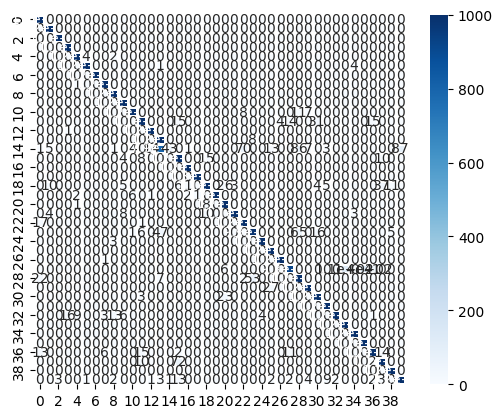

In [ ]:
matrix=sns.heatmap(CFM2, linewidths=1,vmax=1000,
                  square=True, cmap="Blues",annot=True)
accuracy_score=accuracy_score(test_labels2, predicted_labels2)
print('test dataset accuracy:',accuracy_score)

In [ ]:
from tensorflow .keras.applications.resnet50 import ResNet50
from tensorflow .keras.applications.resnet50 import preprocess_input
from keras.models import Model
from keras.preprocessing import image
import keras.utils as image

base_model = ResNet50(weights="imagenet",include_top= False,input_shape=(64,64,3))

#base_model.summary()
base_model.trainable = False
model_1 = Sequential()

model_1.add(base_model)
model_1.add(Flatten())
model_1.add(Dense(1000, activation='relu'))
model_1.add(Dense(200, activation='relu'))
model_1.add(Dense(40, activation='softmax'))
model_1.summary()
# stacking everything together


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_10 (Flatten)        (None, 8192)              0         
                                                                 
 dense_48 (Dense)            (None, 1000)              8193000   
                                                                 
 dense_49 (Dense)            (None, 200)               200200    
                                                                 
 dense_50 (Dense)            (None, 40)                8040      
                                                                 
Total params: 31,988,952
Trainable params: 8,401,240
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:

model_1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history=model_1.fit(dataset_train, epochs = 120,validation_data=test,shuffle =1)

Epoch 1/120
97/97 [==============================] - 24s 218ms/step - loss: 0.1652 - accuracy: 0.9731 - val_loss: 0.0552 - val_accuracy: 0.9844
Epoch 2/120
97/97 [==============================] - 20s 209ms/step - loss: 0.0065 - accuracy: 0.9999 - val_loss: 0.0267 - val_accuracy: 0.9887
Epoch 3/120
97/97 [==============================] - 20s 204ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy: 0.9881
Epoch 4/120
97/97 [==============================] - 21s 213ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0208 - val_accuracy: 0.9894
Epoch 5/120
97/97 [==============================] - 20s 204ms/step - loss: 8.0001e-04 - accuracy: 1.0000 - val_loss: 0.0198 - val_accuracy: 0.9906
Epoch 6/120
97/97 [==============================] - 21s 212ms/step - loss: 5.1465e-04 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 0.9931
Epoch 7/120
97/97 [==============================] - 20s 207ms/step - loss: 3.7013e-04 - accuracy: 1.0000 - val_loss: 0.0167 - v

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
dataset_train.reset()
test.reset()

predicted_scores3 = model_1.predict(dataset_test, verbose=1)
predicted_labels3 = predicted_scores3.argmax(axis=1)

train_labels3 = dataset_test.labels

print(train_labels3)
print(predicted_labels3)

acc_score3 = accuracy_score(train_labels3, predicted_labels3)
CFM3 = confusion_matrix(train_labels3, predicted_labels3)

print("\n", "Accuracy: " + str(format(acc_score3,'.3f')))
print("\n", "CFM: \n", confusion_matrix(train_labels3, predicted_labels3))
print("\n", "Classification report: \n", classification_report(train_labels3, predicted_labels3))

97/97 [==============================] - 19s 189ms/step
[ 0  0  0 ... 39 39 39]
[ 0  0  0 ... 39 39 39]

 Accuracy: 1.000

 CFM: 
 [[1120    0    0 ...    0    0    0]
 [   0 1212    0 ...    0    0    0]
 [   0    0 1120 ...    0    0    0]
 ...
 [   0    0    0 ... 1213    0    0]
 [   0    0    0 ...    0 1245    0]
 [   0    0    0 ...    0    0 1217]]

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1120
           1       1.00      1.00      1.00      1212
           2       1.00      1.00      1.00      1120
           3       1.00      1.00      1.00      1120
           4       1.00      1.00      1.00      1220
           5       1.00      1.00      1.00      1210
           6       1.00      1.00      1.00      1220
           7       1.00      1.00      1.00      1220
           8       1.00      1.00      1.00      1221
           9       1.00      1.00      1.00      1235
          10       

In [ ]:
predicted_scores4 = model_1.predict(test, verbose=1)
predicted_labels4 = predicted_scores4.argmax(axis=1)

4/4 [==============================] - 1s 149ms/step


In [ ]:
test_labels4 = test.labels
print(test_labels4)
#print(predicted_scores)
print(predicted_labels4)

[ 0  0  0 ... 39 39 39]
[ 0  0  0 ... 39 39 39]


In [ ]:
acc_score4 = accuracy_score(test_labels4, predicted_labels4)
CFM4 = confusion_matrix(test_labels4, predicted_labels4)

print("\n", "Accuracy: " + str(format(acc_score4,'.3f')))
print("\n", "CFM: \n", confusion_matrix(test_labels4, predicted_labels4))
print("\n", "Classification report: \n", classification_report(test_labels4, predicted_labels4))


 Accuracy: 0.996

 CFM: 
 [[40  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ... 40  0  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  0  0 ...  0  0 40]]

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        40
           9       1.00      1.00      1.00        40
          10       1.00      1.00      1.00        40
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        40
          13       1.00      1.00

test dataset accuracy: 0.995625


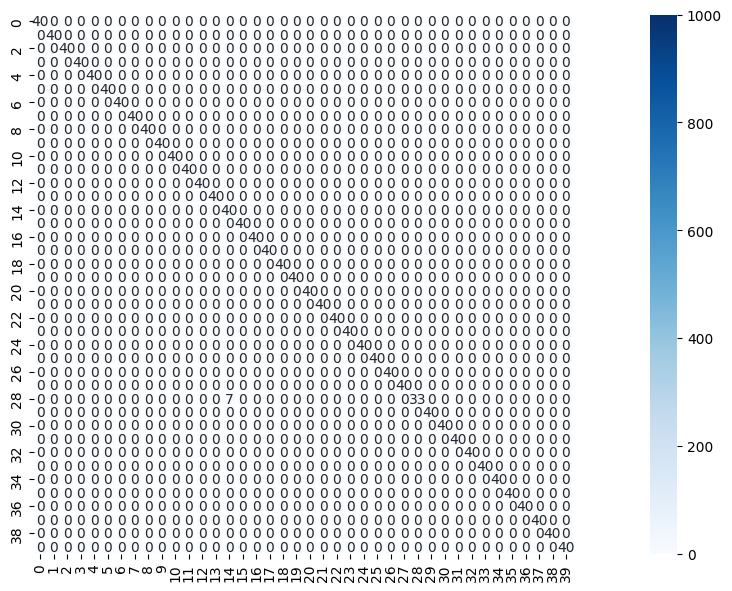

In [ ]:
plt.figure(figsize = (20,7))
matrix=sns.heatmap(CFM4, linewidths=1,vmax=1000,
                  square=True, cmap="Blues",annot=True)
accuracy_score4=accuracy_score(test_labels4, predicted_labels4)
print('test dataset accuracy:',accuracy_score4)

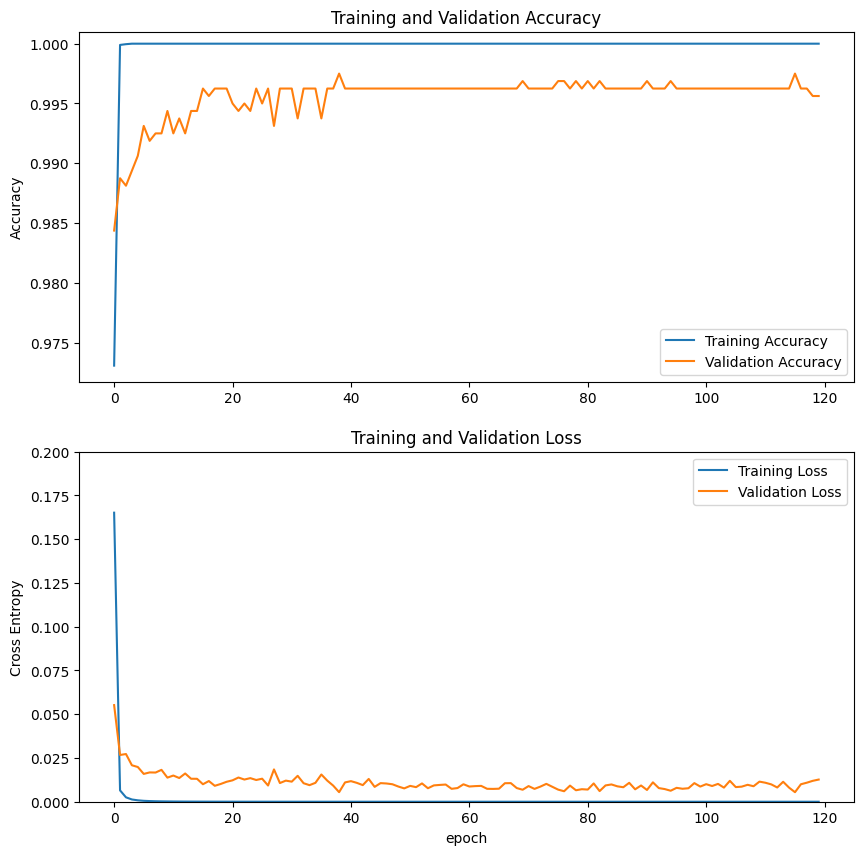

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.001])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,.2])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()